# Souvislost mezi růstem HDP a růstem cen potravin/mezd

## Seznámení s obsahem

K určení, zda růst HDP souvisí s růstem cen potravin/mezd v aktuálním či následujícím roce, byla provedena korelační analýza, 
a to celkem u 4 datových sad:
1) závislost mezi růstem HDP v daném roce a růstem mezd
2) závislost mezi růstem HDP v daném roce a růstem mezd v následujícím roce
3) závislost mezi růstem HDP v daném roce a růstem cen potravin
4) závislost mezi růstem HDP v daném roce a růstem cen potravin v následujícím roce.

## Metodika

Korelační analýza, tedy vyhodnocení (ne)závislosti dvou proměnných byla provedena následujícím způsobem:
1) Pro ilustraci byl pro každý dataset připraven bodový graf (scatter plot).
2) Následně byl pro každý dataset vyhodnocen **Spearmanův korelační koeficient**:
    * **Spearmannův korelační koeficient** (*ρ*) měří obecně sílu a směr monotonního vztahu mezi proměnnými. Tento koeficient je vhodný pro menší datasety a nepředpokládá normalitu dat (což nelze na malém datasetu jednoduše ověřit). Nabývá hodnot od -1 do 1:
        - *ρ* = 1 značí dokonalý rostoucí monotónní vztah,
        - *ρ* = -1 značí dokonalý klesající monotónní vztah,
        - *ρ* = 0 znamená, že mezi veličinami není žádný monotonní vztah.
    * Pokud se tedy například blíží směrem k 1, signalizuje to možnost existence určité **pozitivní korelace** mezi dvěma veličinami (tedy pokud jedna veličina roste, druhá rovněž roste), a naopak, pokud se blíží k -1, může to znamenat **negativní korelaci** mezi veličinami (tedy pokud jedna veličina roste, druhá klesá)
3) Pro vyhodnocení věrohodnosti hodnot Spearmanova koeficientu byla dále určena p-hodnota pomocí testu statistické významnosti korelace, a to následujícím způsobem: 
    * Stanovila se tzv. nulová (H<sub>0</sub>) a alternativní hypotéza (H<sub>1</sub>).
        - Nulová hypotéza předpokládá, že mezi proměnnými neexistuje žádný pozitivní vztah (tedy, v našem případě, že *ρ* <= 0)
       - Alternativní hypotéza předpokládá existenci pozitivního vztahu mezi veličinami (tedy že *ρ* > 0), neboť ze zadání nás zajímá, zdali **růst** HDP ovlivňuje **růst** cen potravin/mezd.
    * Vyhodnocení testu se provede pomocí ***p*-hodnoty**: pokud nabývá nízké hodnoty (typicky se pracuje s hodnotou ***p* < 0.05**), pak lze nulovou hypotézu na dané hladině **zamítnout** ve prospěch alternativní hypotézy (což v tomto případě znamená, že **existuje** statisticky významný kladný vztah mezi proměnnými); zatímco pokud je *p*-hodnota **vyšší**, **nelze** nulovou hypotézu zamítnout (a tedy nelze statisticky prokázat závislost mezi proměnnými)

poznámka: Pro korelační analýzu se obecně doporučuje, aby dataset obsahoval alespoň přibližně 30 pozorování, aby bylo možné považovat výsledky za statisticky spolehlivé. Při menším počtu datových bodů je korelace spíše orientační a může být ovlivněna jednotlivými extrémními hodnotami.

## Řešení

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau

In [4]:
df = pd.read_csv('task_5_final_data.csv', delimiter=';')

In [5]:
years_new = [str(year).replace('.0', '') for year in df['year']]
df['year'] = years_new
df.set_index('year', inplace=True)

Tabulka kompletních dat, která budou analyzována:

In [6]:
df

,gdp_percent_growth,avg_percent_food_growth,percent_payroll_growth
year,,,
1990,NaN,NaN,NaN
1991,-11.61,NaN,NaN
1992,-0.51,NaN,NaN
1993,0.06,NaN,NaN
1994,2.91,NaN,NaN
1995,6.50,NaN,NaN
1996,4.27,NaN,NaN
1997,-0.52,NaN,NaN
1998,-0.36,NaN,NaN


### 1) Ověření korelace: růst HDP(současný rok) a meziroční růst mezd(současný rok)
Ověření závislosti mezi růstem HDP v daném roce a růstem mezd v daném roce.

In [7]:
df_payroll = df[['gdp_percent_growth', 'percent_payroll_growth']]

In [8]:
df_payroll = df_payroll.dropna(how='any')

In [9]:
df_payroll

,gdp_percent_growth,percent_payroll_growth
year,,
2001,3.04,9.87
2002,1.57,8.44
2003,3.58,5.91
2004,4.81,6.27
2005,6.60,5.63
2006,6.77,6.78
2007,5.57,6.88
2008,2.69,7.69
2009,-4.66,3.07


<Axes: xlabel='gdp_percent_growth', ylabel='percent_payroll_growth'>

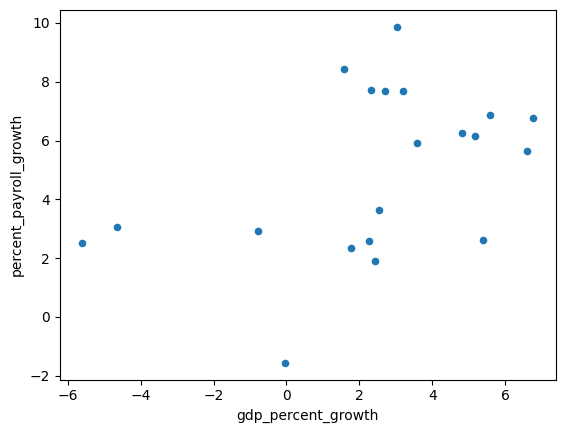

In [10]:
df_payroll.plot(x='gdp_percent_growth', y='percent_payroll_growth', kind='scatter')

#### Test: 
* H<sub>0</sub> (nulová hypotéza): Mezi růstem HDP a růstem mezd ve stejném roce neexistuje statisticky významná pozitivní korelace.
* H<sub>1</sub> (alternativní hypotéza): Mezi růstem HDP a růstem mezd ve stejném roce existuje statisticky významná pozitivní korelace.

In [11]:
spearman, p_value_spearman = spearmanr(df_payroll['gdp_percent_growth'], df_payroll['percent_payroll_growth'])

In [12]:
print(f"Spearmanův koeficient: {spearman}, p-hodnota: {p_value_spearman/2}")

Spearmanův koeficient: 0.39097744360902253, p-hodnota: 0.04414005105330698


#### Zhodnocení:

Scatter plot dané datové sady naznačuje, že může existovat určitá pozitivní korelace mezi růstem HDP a růstem mezd v daném roce. Z korelační analýzy (jednostranný test) byly získány následující hodnoty:
* Spearmanův koeficient *ρ* = 0.390
* *p*-hodnota = 0.044

Spearmanův koeficient vychází kladně, což indikuje pozitivní vztah mezi růstem HDP a růstem mezd. Jelikož je *p*-hodnota menší než 0.05, lze zamítnout nulovou hypotézu o neexistenci pozitivní korelace (H<sub>0</sub>) ve prospěch alternativní hypotézy (H<sub>1</sub>) o existenci pozitivní korelace mezi danými veličinami. 

Lze tedy říci, že existuje středně silná závislost mezi růstem HDP a růstem mezd ve stejném roce, tedy v období ekonomického růstu mají mzdy rovněž tendenci růst.


### 2) Ověření korelace: růst HDP(současný rok) a meziroční růst mezd(následující rok)
Ověření závislosti mezi růstem HDP v daném roce a růstem mezd v daném roce.

In [13]:
df_payroll_next = df_payroll

In [14]:
df_payroll_next['percent_payroll_growth_next_year'] = df_payroll_next['percent_payroll_growth'].shift(-1)

In [15]:
df_payroll_next = df_payroll_next.dropna(how='any')

In [16]:
df_payroll_next

,gdp_percent_growth,percent_payroll_growth,percent_payroll_growth_next_year
year,,,
2001,3.04,9.87,8.44
2002,1.57,8.44,5.91
2003,3.58,5.91,6.27
2004,4.81,6.27,5.63
2005,6.60,5.63,6.78
2006,6.77,6.78,6.88
2007,5.57,6.88,7.69
2008,2.69,7.69,3.07
2009,-4.66,3.07,1.91


<Axes: xlabel='gdp_percent_growth', ylabel='percent_payroll_growth_next_year'>

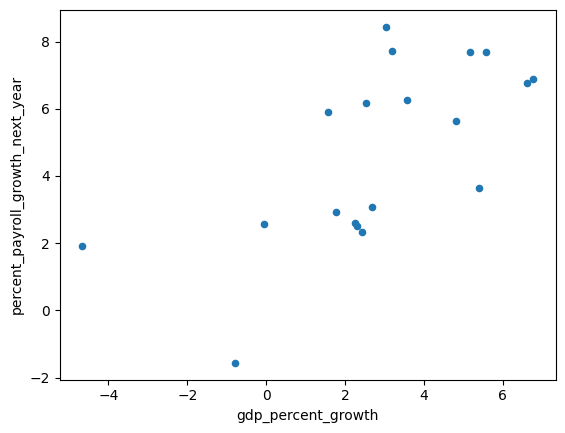

In [17]:
df_payroll_next.plot(x='gdp_percent_growth', y='percent_payroll_growth_next_year', kind='scatter')

#### Test: 
* H<sub>0</sub> (nulová hypotéza): Mezi růstem HDP a růstem mezd v následujícím roce neexistuje statisticky významná pozitivní korelace.
* H<sub>1</sub> (alternativní hypotéza): Mezi růstem HDP a růstem mezd v následujícím roce existuje statisticky významná pozitivní korelace.

In [18]:
spearman, p_value_spearman = spearmanr(df_payroll_next['gdp_percent_growth'], df_payroll_next['percent_payroll_growth_next_year'])

In [19]:
print(f"Spearmanův koeficient: {spearman}, p-hodnota: {p_value_spearman/2}")

Spearmanův koeficient: 0.7298245614035088, p-hodnota: 0.00019488623939445163


#### Zhodnocení:

Scatter plot v tomto případě naznačuje existenci závislosti mezi růstem HDP a růstem mezd v následujícím roce, a to výrazněji než v předchozím případě. Z korelační analýzy (jednostranný test) byly získány následující hodnoty:
* Spearmanův koeficient *ρ* = 0.730
* *p*-hodnota = 0.000

Spearmanův koeficient je kladný, což indikuje pozitivní korelaci, *p*-hodnota je výrazně nižší než 0.05, můžeme tedy zamítnout nulovou hypotézu H<sub>0</sub> o neexistenci pozitivního vztahu a přijmout alternativní hypotézu H<sub>1</sub>, tedy že mezi růstem HDP a růstem mezd v následujícím roce pozitivní korelace existuje. I přes menší počet pozorování ve statistickém souboru lze tento výsledek považovat za věrohodný, neboť *p*-hodnota je výrazně nižší než hranice statistické významnosti (0.05).

Lze tedy konstatovat, že růst HDP se výrazněji projevuje růstem mezd s přibližně ročním zpožděním.

### 3) Ověření korelace: růst HDP(současný rok) a meziroční růst cen potravin(současný rok)
Oddíl se týká vztahu mezi růstem HDP a růstem cen potravin ve stejném roce.

In [20]:
df_food = df[['gdp_percent_growth', 'avg_percent_food_growth']]

In [21]:
df_food = df_food.dropna(how='any')
df_food

,gdp_percent_growth,avg_percent_food_growth
year,,
2007,5.57,9.26
2008,2.69,8.91
2009,-4.66,-6.57
2010,2.43,1.51
2011,1.76,4.84
2012,-0.79,7.47
2013,-0.05,6.01
2014,2.26,-0.63
2015,5.39,-0.69


<Axes: xlabel='gdp_percent_growth', ylabel='avg_percent_food_growth'>

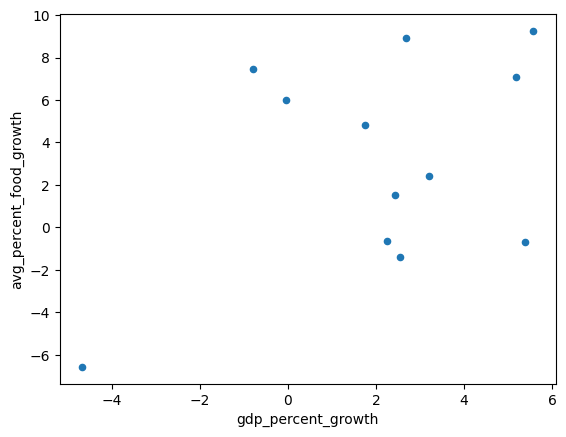

In [22]:
df_food.plot(x='gdp_percent_growth', y='avg_percent_food_growth', kind='scatter')

#### Test: 
* H<sub>0</sub> (nulová hypotéza): Mezi růstem HDP a růstem cen potravin ve stejném neexistuje statisticky významná pozitivní korelace.
* H<sub>1</sub> (alternativní hypotéza): Mezi růstem HDP a růstem cen potravin ve stejném roce existuje statisticky významná pozitivní korelace.

In [23]:
spearman, p_value_spearman = spearmanr(df_food['gdp_percent_growth'], df_food['avg_percent_food_growth'])

In [24]:
print(f"Spearmanův koeficient: {spearman}, p-hodnota: {p_value_spearman/2}")

Spearmanův koeficient: 0.27272727272727276, p-hodnota: 0.1955483854709481


Scatter plot v tomto případě neukazuje zřetelný trend. Je nutné rovněž zmínit, že dataset je v tomto případě velmi malý (12 pozorování), tudíž korelační analýza má v tomto případě spíše orientační charakter. Výsledky korelační analýzy jsou následující:
* Spearmanův koeficient *ρ* = 0.273
* *p*-hodnota = 0.196

Korelační koeficient vychází kladný, což indikuje možnost existence slabě pozitivní korelace mezi oběma veličinami; nicméně *p*-hodnota v tomto případě nabývá vysoké hodnoty (> 0.05), nelze tedy zamítnout nulovou hypotézu o neexistenci pozitivního vztahu mezi růstem HDP a růstem cen potravin. Nebyl tedy prokázán pozitivní vztah mezi  mezi růstem HDP a růstem cen potravin.

### 4) Ověření korelace: růst HDP(současný rok) a meziroční růst cen potravin(následující rok)

In [25]:
df_food_next = df_food
df_food_next['avg_percent_food_growth_next_year'] = df_food_next['avg_percent_food_growth'].shift(-1)

In [26]:
df_food_next = df_food_next.dropna(how='any')

In [27]:
df_food_next

,gdp_percent_growth,avg_percent_food_growth,avg_percent_food_growth_next_year
year,,,
2007,5.57,9.26,8.91
2008,2.69,8.91,-6.57
2009,-4.66,-6.57,1.51
2010,2.43,1.51,4.84
2011,1.76,4.84,7.47
2012,-0.79,7.47,6.01
2013,-0.05,6.01,-0.63
2014,2.26,-0.63,-0.69
2015,5.39,-0.69,-1.41


<Axes: xlabel='gdp_percent_growth', ylabel='avg_percent_food_growth_next_year'>

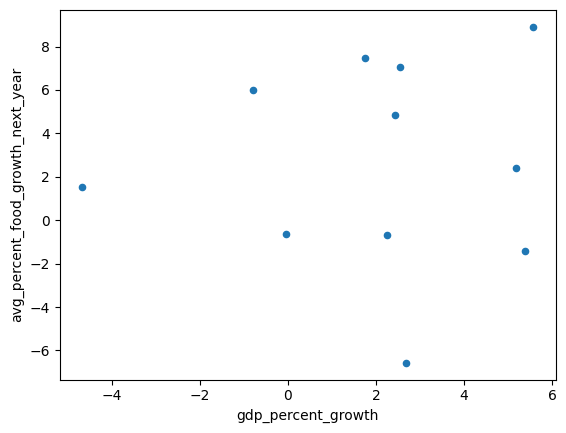

In [28]:
df_food_next.plot(x='gdp_percent_growth', y='avg_percent_food_growth_next_year', kind='scatter')

#### Test: 
* H<sub>0</sub> (nulová hypotéza): Mezi růstem HDP a růstem cen potravin v následujícím roce neexistuje statisticky významná pozitivní korelace.
* H<sub>1</sub> (alternativní hypotéza): Mezi růstem HDP a růstem cen potravin v následujícím roce existuje statisticky významná pozitivní korelace.

In [29]:
spearman, p_value_spearman = spearmanr(df_food_next['gdp_percent_growth'], df_food_next['avg_percent_food_growth_next_year'])

In [30]:
print(f"Spearmanův koeficient: {spearman}, p-hodnota: {p_value_spearman/2}")

Spearmanův koeficient: 0.0, p-hodnota: 0.5


V tomto případě je opět k dispozici velmi malý dataset (11 pozorování), čili výsledky lze opět považovat spíše za orientační. Výsledky korelační analýzy (jednostranného testu) jsou následující: 
* Spearmanův koeficient *ρ* = 0.0,
* *p*-hodnota = 0.5

V tomto případě nebyla prokázána pozitivní korelace mezi růstem HDP a růstem cen potravin, jak vyplývá z hodnoty korelačního koeficientu i vysoké *p*-hodnoty. Na základě dostupných dat tedy lze konstatovat, že růst HDP v jednom roce neindikuje růst cen potravin v roce následujícím.

## Zdroje:
- https://is.muni.cz/www/98951/41610771/43823411/43823458/44159634/44707073/Pavlik_-_Biostatistika_-_kapitola_11.pdf
- https://is.muni.cz/el/1431/jaro2010/M6130/um/7457761/prednaska10.pdf